<a href="https://colab.research.google.com/github/sejin-sim/Math/blob/main/8_1_%EC%82%AC%EC%9D%B4%ED%8C%8C%EC%9D%B4%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_%ED%99%95%EB%A5%A0%EB%B6%84%ED%8F%AC_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# 그래프 setting
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm
import warnings

# warnings.filterwarnings(action='ignore') 

%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=11)
plt.rcParams["figure.figsize"] = (10,6)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [12]:
import scipy as sp # 치해석기능을 제공하는 파이썬 패키지
import scipy.stats # 확률분포 분석을 위한 다양한 기능

### 1) 확률분포 클래스

- 사이파이 확률분포 기능 사용하기 위해서 확률분포 클래스 객체 선 생성 필요
- 확률분포 객체 생성 명령 (stats에 포함되어 있음)
 
| 종류 | 명령 | 확률분포 |
|-|-|-|
| 이산 | `bernoulli` | 베르누이분포 |
| 이산 | `binom` |  이항분포 |
| 이산 | `multinomial` |  다항분포 |
| 연속 | `uniform` | 균일분포 |
| 연속 | `norm` | 정규분포 |
| 연속 | `beta` | 베타분포 |
| 연속 | `gamma` | 감마분포 |
| 연속 | `t` | 스튜던트 t분포 |
| 연속 | `chi2` | 카이 제곱분포 |
| 연속 | `f` | F분포 |
| 연속 | `dirichlet` | 디리클리분포 |
| 연속 | `multivariate_normal` | 다변수 정규분포 |


In [13]:
# 정규 분포 객체
rv = sp.stats.norm()

### 2) 모수 지정
- 확률분포 객체 생성 시 모수를 인수로 주어야 함 → 각 확률분포마다 설정할 모수 상이
- 모수(parameter) : 분포의 형상을 구체적으로 지정

| 인수(모수) 이름 | 의미 |
|-|-|
| `loc` | 일반적으로 분포의 기댓값 |
| `scale` |  일반적으로 분포의 표준편차 | 

In [14]:
# 기댓값이 1이고, 표준 편차가 2인 정규분포 객체
rv = sp.stats.norm(loc=1, scale=2)

### 3) 확률분포 메서드

| 메서드 | 기능 |
|-|-|
| `pmf` | 확률질량함수(probability mass function) |
| `pdf` | 확률밀도함수(probability density function) |
| `cdf` | 누적분포함수(cumulative distribution function)  |
| `ppf` | 누적분포함수의 역함수(inverse cumulative distribution function)  |
| `sf` | 생존함수(survival function) = 1 - 누적분포함수  |
| `isf` | 생존함수의 역함수(inverse survival function)  |
| `rvs` | 랜덤 표본 생성(random variable sampling)    |

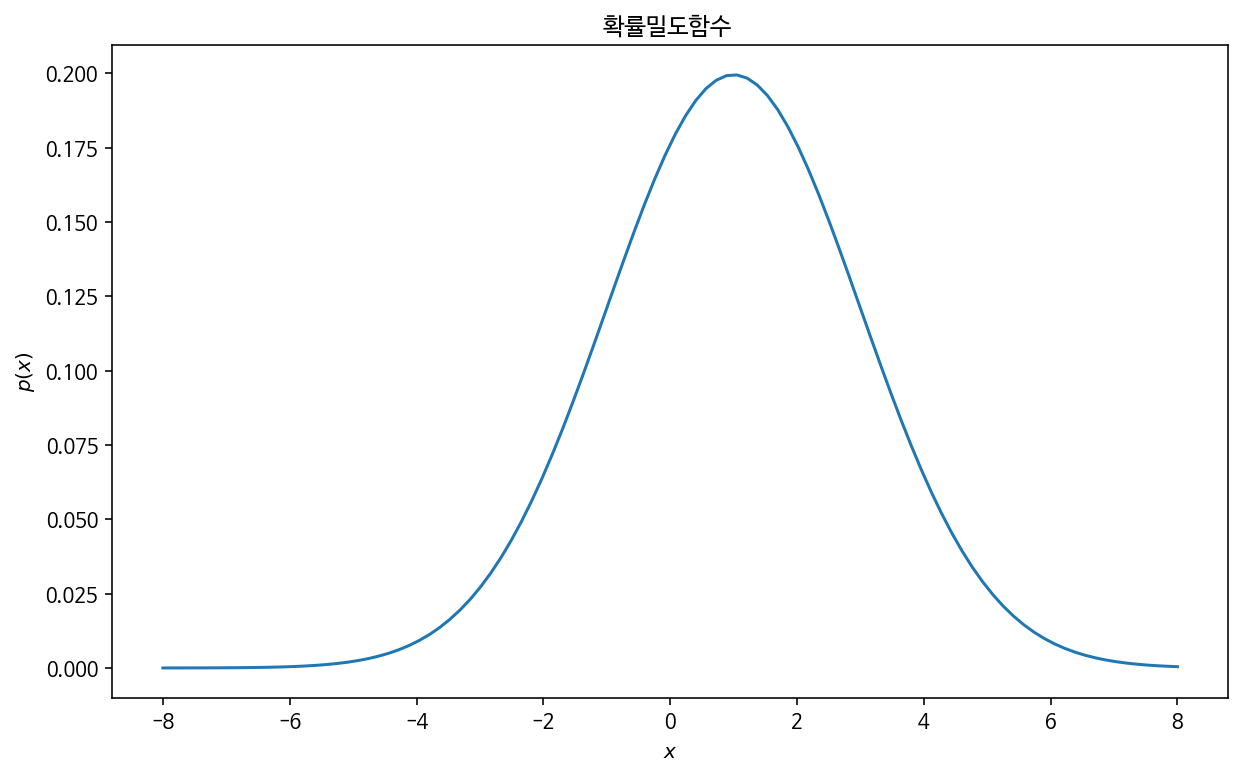

0.19940754996011884

In [15]:
# 연속확률변수의 확률밀도함수
xx = np.linspace(-8, 8, 100)

pdf = rv.pdf(xx)

plt.plot(xx, pdf)
plt.title("확률밀도함수 ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

pdf.max()

#### 연습 문제 8.1.1

(1) 기댓값이 0이고 표준 편차가 0.1인 정규분포의 객체를 만들고 확률밀도함수를 그려라. 

(2) 이 확률밀도함수의 최대값은 얼마인가?

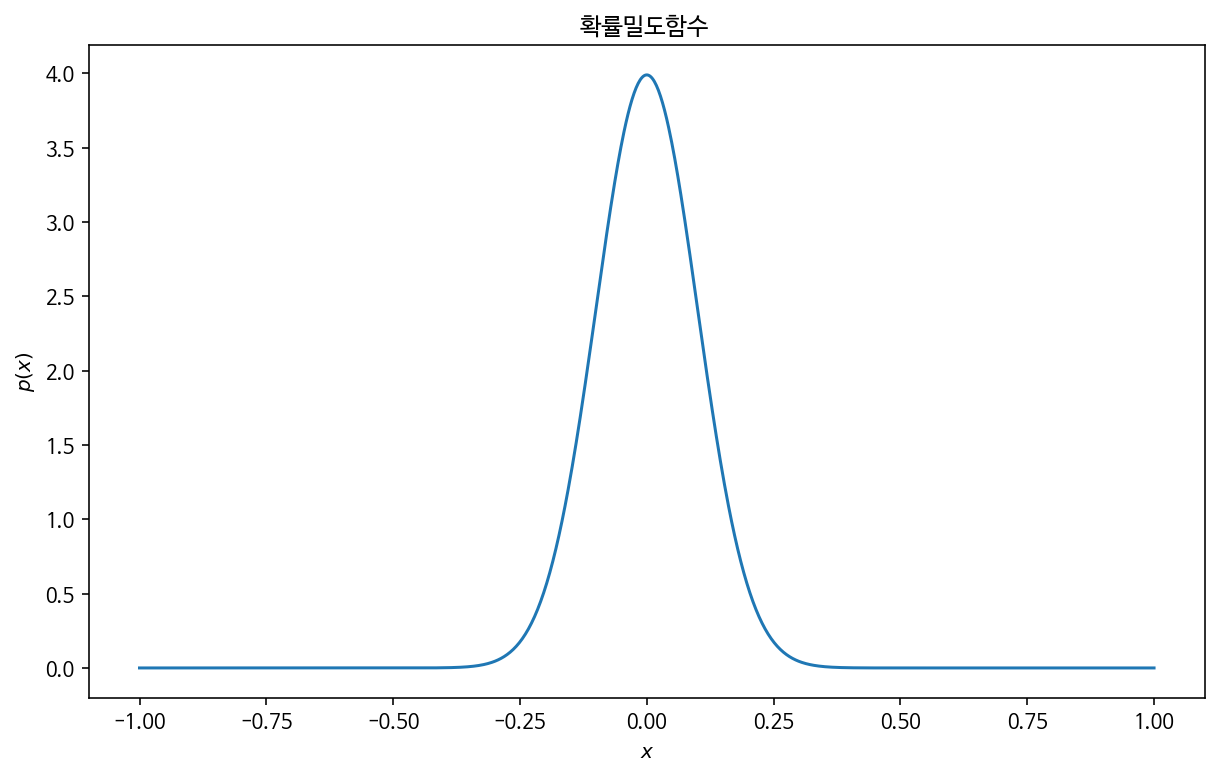

3.989422804014327

In [16]:
# (1) 답

xx = np.linspace(-1, 1, 1000)
rv = sp.stats.norm(loc=0, scale=0.1)
pdf = rv.pdf(xx)

plt.plot(xx, pdf)
plt.title("확률밀도함수 ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

# (2) 답
rv.pdf(0)

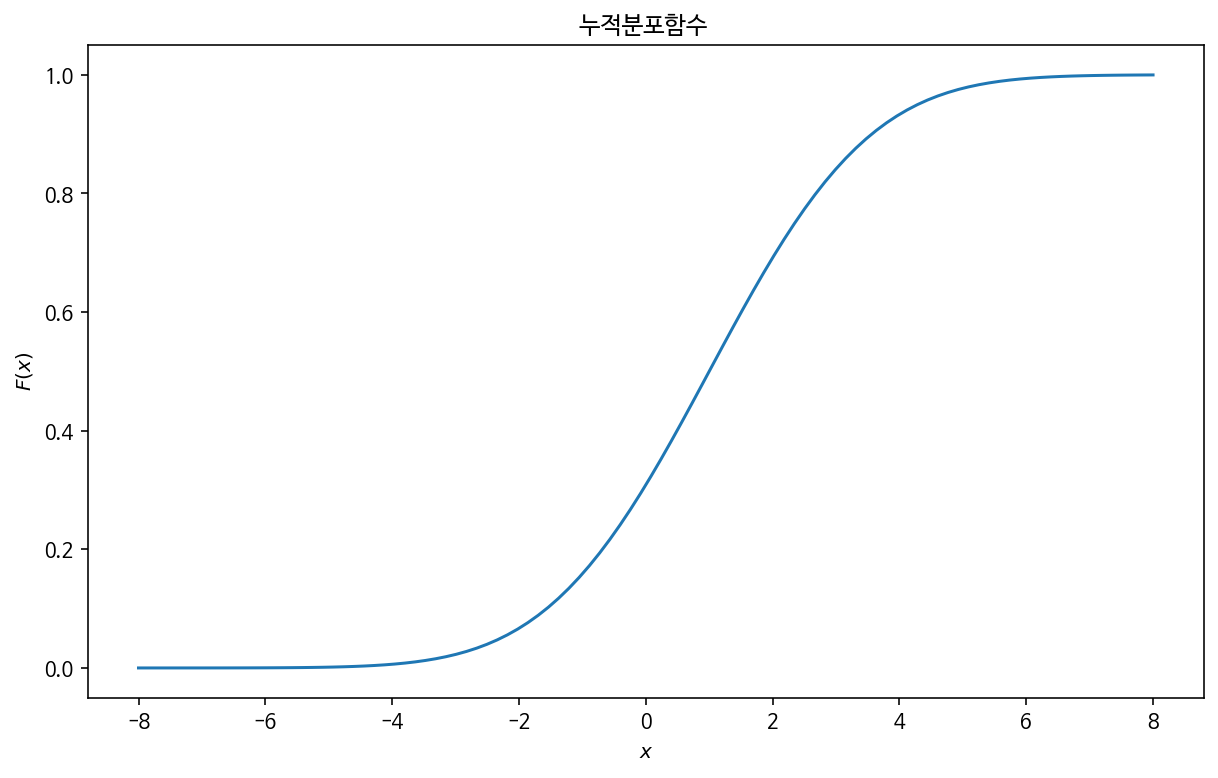

In [17]:
# 이산확률변수와 연속확률변수의 누적분포함수

rv = sp.stats.norm(loc=1, scale=2)

xx = np.linspace(-8, 8, 100)
cdf = rv.cdf(xx)
plt.plot(xx, cdf)
plt.title("누적분포함수 ")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.show()

In [18]:
# 무작위 표본 생성
rv.rvs(size=(3, 5), random_state=0)

array([[ 4.52810469,  1.80031442,  2.95747597,  5.4817864 ,  4.73511598],
       [-0.95455576,  2.90017684,  0.69728558,  0.7935623 ,  1.821197  ],
       [ 1.28808714,  3.90854701,  2.52207545,  1.24335003,  1.88772647]])

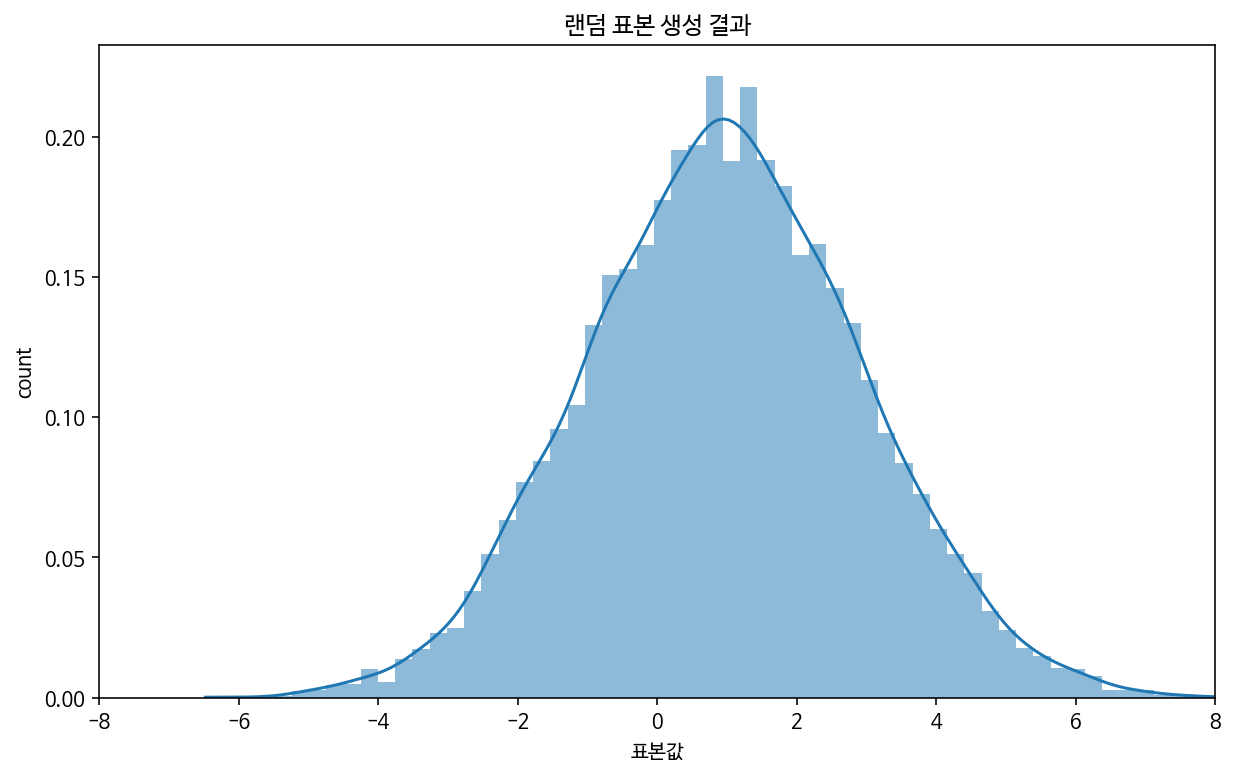

In [19]:
sns.histplot(rv.rvs(size=10000, random_state=0), kde=True, stat="density", linewidth=0) # size : 표본 크기
plt.title("랜덤 표본 생성 결과")
plt.xlabel("표본값")
plt.ylabel("count")
plt.xlim(-8, 8)
plt.xlim(-8, 8)
plt.show()

#### 연습 문제 8.1.2

``rvs`` 명령으로 1000개의 정규분포의 표본 데이터를 생성하고 이 표본 데이터로부터 표본평균과 비편향 표본분산을 계산하라. 이 값이 인수로 넣은 기댓값과 분산과 비슷한지 비교하라.

In [20]:
# 답
rvs_new = sp.stats.norm().rvs(size=1000, random_state=0)
print("표본평균 : ", rvs_new.mean())
print("표본분산 : ", rvs_new.std(ddof=1))
print("정규 포본 모수 loc=1, scale=2")

표본평균 :  -0.045256707490195384
표본분산 :  0.9875270456945128
정규 포본 모수 loc=1, scale=2


### 4) 변환 확률변수의 시뮬레이션

- 시뮬레이션을 통해 확률변수의 표본을 가공하여 만들어진 변환(transform) 확률변수의 확률분포 파악 가능
- ex) 0~1 사이 균일분포를 가지는 확률변수에서 두 표본값을 생성하여 이 두 값을 합하는 결과는?  
> 두 표본값의 합은 균일분포가 되지 X. 시뮬레이션으로 확인하면 1에서 최빈값을 가지는 삼각형 모양의 분포가 됨

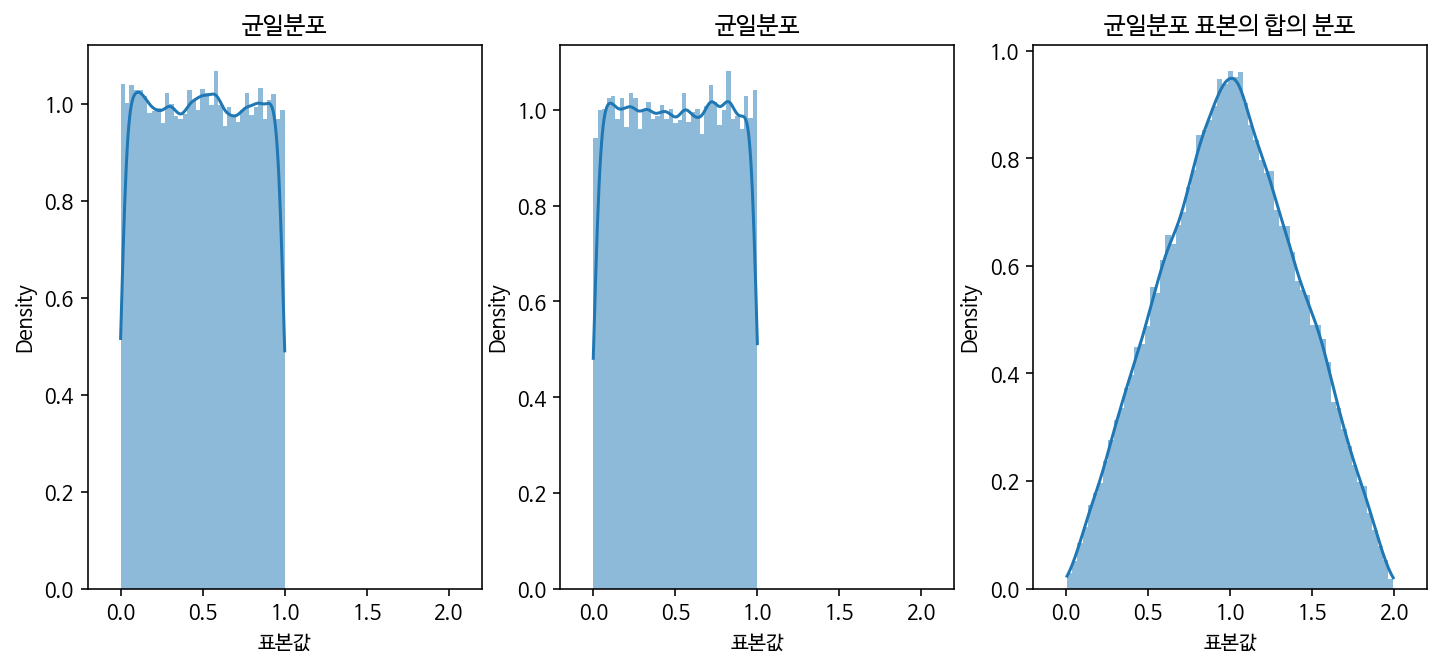

In [21]:
rv1 = sp.stats.uniform()
rv2 = sp.stats.uniform()

np.random.seed(0)
N = 50000
x_1 = rv1.rvs(N)
x_2 = rv2.rvs(N)
x_3 = x_1 + x_2

plt.figure(figsize=(12, 5))

plt.subplot(131)
sns.histplot(x_1, kde=True, stat="density", linewidth=0) 
plt.title("균일분포")
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.subplot(132)
sns.histplot(x_2, kde=True, stat="density", linewidth=0) 
plt.title("균일분포")
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.subplot(133)
sns.histplot(x_3, kde=True, stat="density", linewidth=0) 
plt.title("균일분포 표본의 합의 분포")
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.show()

#### 연습 문제 8.1.3

균일분포 확률분포에서 두 개가 아닌 10개 표본값을 생성하여 그 값의 합을 구하면 어떤 모양의 분포를 이루는지 시뮬레이션 기능을 사용하여 구하라. 이 때 시뮬레이션은 1000번 반복한다. 

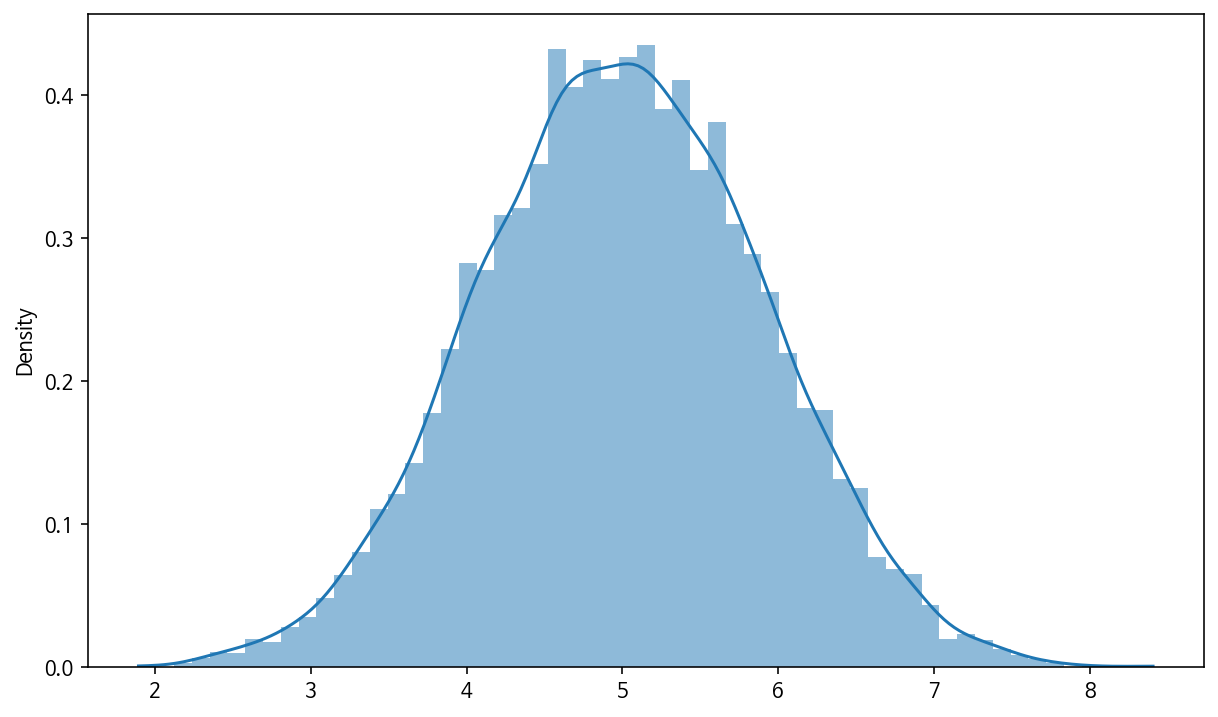

In [25]:
np.random.seed(0)
x = sp.stats.uniform().rvs((10, 10000))
x_sum = x.sum(axis=0)
sns.histplot(x_sum, kde=True, stat="density", linewidth=0)
plt.show()